## Visualizing historical stock data

The following code shows how to get historical data of a stock from Google Finance and plot a candlestick chart with simple moving average (SMA), exponential moving average (EMA), and Moving Average Convergence Divergence (MACD).

The code is an expansion of an answer in this [Stack Overflow thread](http://stackoverflow.com/questions/19580116/plotting-candlestick-data-from-a-dataframe-in-python).

In [1]:
import sys
sys.version

'3.5.3 |Continuum Analytics, Inc.| (default, May 15 2017, 10:43:23) [MSC v.1900 64 bit (AMD64)]'

In [2]:
# import necessary libraries

%matplotlib inline  

import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
# from matplotlib import ticker as mticker
from matplotlib.finance import candlestick_ohlc
import datetime as dt

c:\miniconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [3]:
# requesting and reformatting data

symbol = "AAPL"
data = web.DataReader(symbol, 'google', '2015-12-31', end = dt.datetime.now())  # use 'google' or 'yahoo' to pick the data source
data.reset_index(inplace=True)
data['Date']=mdates.date2num(data['Date'].astype(dt.date))

In [4]:
# calculating and setting plot parameters

x = data['Date']

EMA_1_span = 7
EMA_1 = data['Close'].ewm(span=EMA_1_span,min_periods=EMA_1_span).mean()

EMA_2_span = 30
EMA_2 = data['Close'].ewm(span=EMA_2_span,min_periods=EMA_2_span).mean()

SMA_2_span = EMA_2_span
SMA_2 = data['Close'].rolling(window=SMA_2_span,center=False).mean()

MACD = EMA_1 - EMA_2

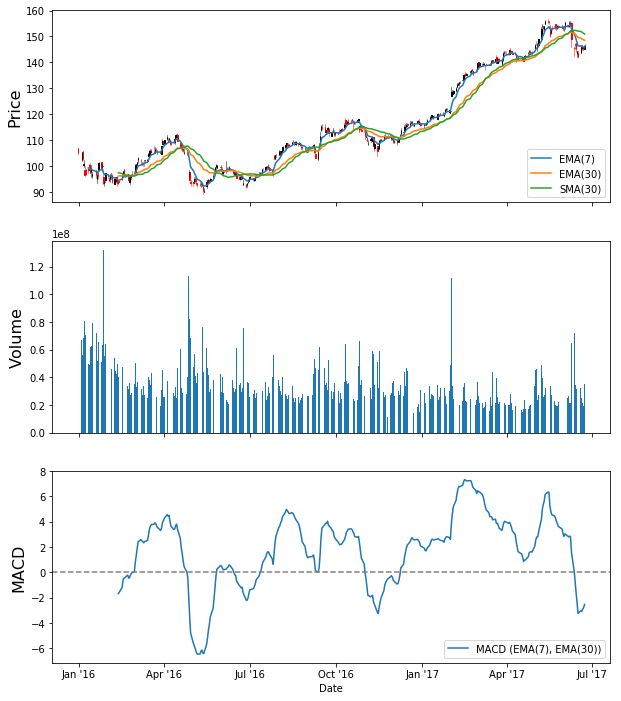

In [6]:
# plotting
 
fig, (ax, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(10,12))

# plot candlestick, SAM, EMA in subplot_1
candlestick_ohlc(ax,data.values,width=0.5);
p1 = ax.plot(x, EMA_1, label='EMA(' + str(EMA_1_span) + ')')
p2 = ax.plot(x, EMA_2, label='EMA(' + str(EMA_2_span) + ')')
p3 = ax.plot(x, SMA_2, label='SMA(' + str(SMA_2_span) + ')')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.MonthLocator([1,4,7,10]))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b '%y"))
ax.set_ylabel('Price', fontsize=16)
ax.legend(loc=4)

# plot volume in subplot_2
ax2.bar(x,data['Volume']);
ax2.set_ylabel('Volume', fontsize=16)

# plot MACD in subplot_3
ax3.plot(x, MACD, label='MACD (' + 'EMA(' + str(EMA_1_span) + '), ' + 'EMA(' + str(EMA_2_span) + '))')
ax3.axhline(0, color='gray', linestyle='--')
ax3.set_xlabel('Date')
ax3.set_ylabel('MACD', fontsize=16)
ax3.legend(loc=4)


## Obtaining real-time stock price from Google Finance

The code below shows how to get real-time data of a stock from Google Finance page.

It is a modified version of files from this [Github repository](https://github.com/keevee09/hacking-google-finance-in-real-time).

In [6]:
# import libraries

# import urllib.request, time, os, re, csv
import urllib.request, time, re

In [7]:
# define data acquisition function

def fetchGF(googleticker):
    
    url = "http://www.google.com/finance?&q="
    respData = urllib.request.urlopen(url+ticker).read()
    
    # search for the tag with ref id of the stock and get the displayed price and currency
    price=re.search(b'id="ref_(.*?)">(.*?)<', respData)
    currency=re.search(b'Currency in (.*?)<', respData)
    
    if price:
        # get the price and re-format displayed text
        # group 1: ref id of the stock in the html page, group 2: price
        tmp=price.group(2)
        q=tmp.decode().replace(',','') + ' ' + currency.group(1).decode()
    else:
        q="Nothing found for: "+ googleticker
        
    return q

In [8]:
# pick stock and display the current price
ticker = 'NASDAQ:GOOG'

print('As of '+ time.ctime() + ' local time, the price of ' + ticker + ' is ' + fetchGF(ticker) + '.')

As of Sat May  6 10:44:00 2017 local time, the price of NASDAQ:GOOG is 927.13 USD.


## Closing note

The codes above show basic of requesting historical and real-time stock data as well as plotting charts/indicators. With some effort, the process could be made less tedious and more automated.